<a href="https://colab.research.google.com/github/Shriya-cod/Tasks/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING NECESSARY MODULES**


In [33]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**LOADING MNIST DATASET**

In [34]:
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

In [35]:
x_train = train_df.drop('label', axis = 1).values
y_train = train_df['label'].values

x_test = test_df.drop('label', axis = 1).values
y_test = test_df['label'].values

In [36]:
x_train, x_test = x_train/255.0 , x_test/255.0

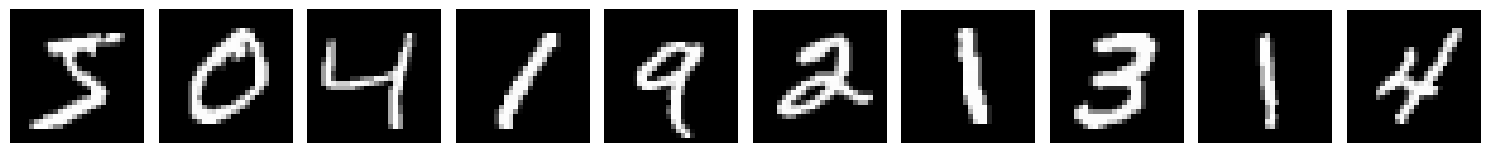

In [66]:
plt.figure(figsize=(15, 2))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(x_train[i].reshape(28, 28), cmap = 'grey')
  plt.axis('off')
plt.tight_layout()
plt.show()

In [37]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


**CREATING A SEQUENTIAL MODEL**

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (784,)),     # Converting into a 1-D array
    tf.keras.layers.Dense(128, activation = 'relu'),    # Hidden layer
    tf.keras.layers.Dropout(0.2),    # Drops a unit out for correction at each epoch
    tf.keras.layers.Dense(10, activation = 'softmax')   # Output layer

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**COMPILING THE MODEL**

In [40]:
model.compile(optimizer = 'adam',
              loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])   # Checking for the accurate predictions

**FITTING THE MODEL**

In [41]:
a = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8597 - loss: 0.4764 - val_accuracy: 0.9598 - val_loss: 0.1388
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9547 - loss: 0.1540 - val_accuracy: 0.9690 - val_loss: 0.1054
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9668 - loss: 0.1082 - val_accuracy: 0.9773 - val_loss: 0.0785
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9726 - loss: 0.0867 - val_accuracy: 0.9755 - val_loss: 0.0837
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9784 - loss: 0.0697 - val_accuracy: 0.9757 - val_loss: 0.0785
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9790 - loss: 0.0636 - val_accuracy: 0.9783 - val_loss: 0.0698
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9825 - loss: 0.0541 - val_accuracy: 0.9795 - val_loss: 0.0713
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9841 - loss: 0.049

**LOSS PER ITERATION**

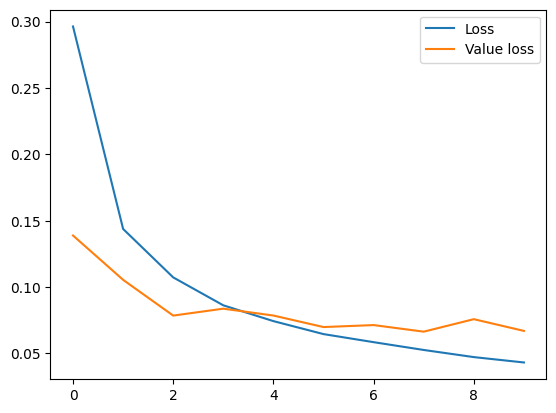

In [44]:
plt.plot(a.history['loss'], label = 'Loss')
plt.plot(a.history['val_loss'], label = 'Value loss')

plt.legend()
plt.show()


**MODEL EVALUATION**

In [45]:
print(model.evaluate(x_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9765 - loss: 0.0824
[0.06694179773330688, 0.9804999828338623]


**CONFUSION MATRIX**

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_predict = model.predict(x_test)
y_predict_max = np.argmax(y_predict, axis = 1)

cm = confusion_matrix(y_test, y_predict_max)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


**DISPLAYING THE MATRIX**

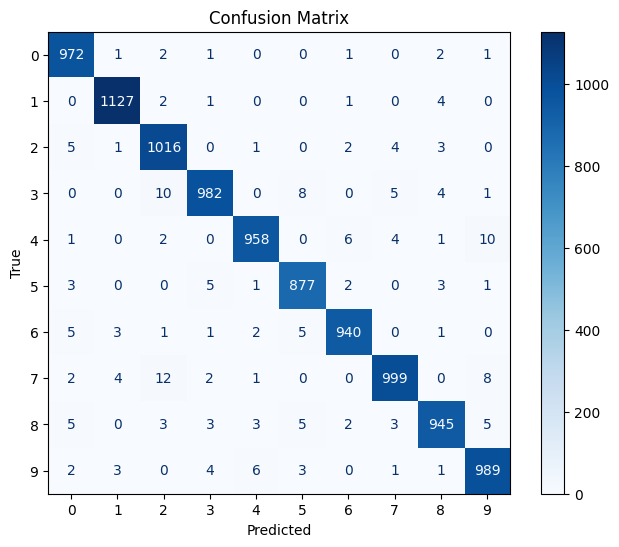

In [84]:
d = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = range(10))
fig, ax = plt.subplots(figsize=(8, 6))



d.plot(ax=ax, cmap = 'Blues', colorbar = True)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


**PLOTTING THE PLACES WHERE THE MODEL WENT WRONG**

Text(0.5, 1.0, 'True label: 7 Predicted label: 1')

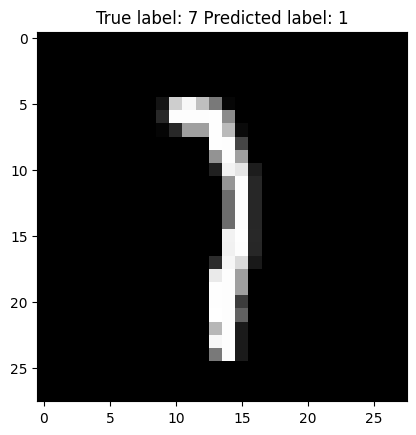

In [88]:
misclassified_index = np.where(y_predict_max!= y_test)[0]
i = np.random.choice(misclassified_index)
plt.imshow(x_test[i].reshape(28, 28), cmap = 'grey')
plt.title("True label: %s Predicted label: %s" % (y_test[i], y_predict_max[i]))

**SAVING THE MODEL**

In [90]:
model.save("MNIST MODEL.keras")